In [2]:
import numpy as np
import pandas as pd

In [3]:
def save_win_dataframe_to_csv(dataframe, filename):
    df = pd.DataFrame(dataframe)
    df.to_csv(filename, index=False)

In [4]:
def save_lose_dataframe_to_csv(dataframe, filename):
    df = pd.DataFrame(dataframe)
    columns_to_exclude_index = [0, 1, 7, 8, 10, 11, 13, 14, 16, 17, 19, 20, 26, 34]  
    columns_to_multiply_by_minus_1_index = [col_idx for col_idx in range(len(df.columns)) if col_idx not in columns_to_exclude_index]
    df.iloc[:, columns_to_multiply_by_minus_1_index] = df.iloc[:, columns_to_multiply_by_minus_1_index] * -1
    df.to_csv(filename, index=False)

In [6]:
#승리팀 DataSet 만드는 코드
#1. 우선 승리팀의 티어(1~4)를 read한다.
data1 = pd.read_csv("Dataset/win/Iron_I.csv")
data2 = pd.read_csv("Dataset/win/Iron_II.csv")
data3 = pd.read_csv("Dataset/win/Iron_III.csv")
data4 = pd.read_csv("Dataset/win/Iron_IV.csv")

#티어별로 2600개씩 슬라이싱 -> 나중에 data1~data4 까지 병합한 이후에 중복제거 하면 10000개로 하면 부족할수있으므로 2600개씩 10400개 수집
data1 = data1.drop(data1.index[2600:])
data2 = data2.drop(data2.index[2600:])
data3 = data3.drop(data3.index[2600:])
data4 = data4.drop(data4.index[2600:])

#데이터 병합하는 과정 및 중복검사 및 제거 keep='first'로 하면 중복되는 값이 있을 경우 처음꺼는 살리고 이후 중복값은 제거 하는 것.
windata = pd.concat([data1,data2,data3,data4])
windata = windata.drop_duplicates(subset=['matchId'], keep='first')
windata = windata.iloc[:10000] # 10400개에서 중복제거하고 10000개로 슬라이싱
compare = windata[windata['matchId'].duplicated(keep=False)] # 중복이 있는지 확인해주는 로직
save_win_dataframe_to_csv(windata,"Dataset/win/Iron_win.csv")
print(windata)
print(compare['matchId'])





#패배팀 DataSet 생성
losedata = pd.read_csv("Dataset/win/Iron_win.csv") # 승리팀 10000개 DataSet을 그대로 가져와서 거기에 -1만 곱해주면 끝.
save_lose_dataframe_to_csv(losedata,"Dataset/lose/lron_lose.csv") #-1 곱해주고 저장해주는 함수



            matchId  queueId  Diff_LV  Diff_CS  Diff_jglCS  Diff-K  \
0     KR_6764348017      420        0       22          -1       2   
1     KR_6717534637      420        3       19          20      15   
2     KR_6144706447      420        1      -14          -5       1   
3     KR_6659596541      440        0      -35          15       1   
4     KR_6674320621      420        0       28          -1       2   
...             ...      ...      ...      ...         ...     ...   
2204  KR_6740877242      440        2      106          28       8   
2205  KR_6759545716      420        3        4          -8       1   
2206  KR_6762684849      420        0      -12          12      -3   
2207  KR_6756055916      420        4        0          12      15   
2208  KR_6738453439      420        2       37           7       4   

      Diff-K-top  K-WIN-top  K-LOSE-top  Diff-K-jug  ...  \
0              3          5           2          -1  ...   
1              2          3           1

In [7]:

windata = pd.read_csv("Dataset/win/Iron_win.csv")
losedata = pd.read_csv("Dataset/lose/lron_lose.csv")
# windata['Diff-K'] = np.where(windata['Diff-K'] > 0, 10, -10)
# losedata['Diff-K'] = np.where(losedata['Diff-K'] > 0, 10, -10)
# windata['Diff-K'] = np.where(windata['Diff-K'] < 0, 0, windata['Diff-K'])
# losedata['Diff-K'] = np.where(losedata['Diff-K'] < 0, 0, losedata['Diff-K'])
# windata['Diff-A'] = np.where(windata['Diff-A'] < 0, 0, windata['Diff-A'])
# losedata['Diff-A'] = np.where(losedata['Diff-A'] < 0, 0, losedata['Diff-A'])
# windata['Diff_CS'] = np.where(windata['Diff_CS'] > 0, 1, -1)
# losedata['Diff_CS'] = np.where(losedata['Diff_CS'] > 0, 1, -1)

In [125]:
losedata['Diff-K'] = losedata['Diff-K']*-1
losedata['Diff-A'] = losedata['Diff-A']*-1
windata['Diff-A'] = windata['Diff-A']*-1
windata = windata.drop("K-LOSE-top", axis=1)
losedata = losedata.drop("K-WIN-top", axis=1)
windata = windata.drop("K-LOSE-jug", axis=1)
losedata = losedata.drop("K-WIN-jug", axis=1)
windata = windata.drop("K-LOSE-mid", axis=1)
losedata = losedata.drop("K-WIN-mid", axis=1)
windata = windata.drop("K-LOSE-ad", axis=1)
losedata = losedata.drop("K-WIN-ad", axis=1)
windata = windata.drop("K-LOSE-sup", axis=1)
losedata = losedata.drop("K-WIN-sup", axis=1)



In [126]:
windata = windata.rename(columns={'K-WIN-top': 'K-top'})
losedata = losedata.rename(columns={'K-LOSE-top': 'K-top'})
# windata = windata.rename(columns={'K-WIN-jug': 'K-jug'})
# losedata = losedata.rename(columns={'K-LOSE-jug': 'K-jug'})
windata = windata.rename(columns={'K-WIN-mid': 'K-mid'})
losedata = losedata.rename(columns={'K-LOSE-mid': 'K-mid'})
windata = windata.rename(columns={'K-WIN-ad': 'K-ad'})
losedata = losedata.rename(columns={'K-LOSE-ad': 'K-ad'})
# windata = windata.rename(columns={'K-WIN-sup': 'K-sup'})
# losedata = losedata.rename(columns={'K-LOSE-sup': 'K-sup'})
windata['K-top'] = np.where(windata['K-top'] > 0, 10, -10)
losedata['K-top'] = np.where(losedata['K-top'] > 0, 10, -10)
windata['K-ad'] = np.where(windata['K-ad'] > 0, 10, -10)
losedata['K-ad'] = np.where(losedata['K-ad'] > 0, 10, -10)
windata['K-mid'] = np.where(windata['K-mid'] > 0, 10, -10)
losedata['K-mid'] = np.where(losedata['K-mid'] > 0, 10, -10)

In [8]:
#display(windata['Diff-A'])
data = pd.concat([windata, losedata])

In [12]:
display(data)

,matchId,queueId,Diff_LV,Diff_CS,Diff_jglCS,Diff-K,Diff-K-top,K-WIN-top,K-LOSE-top,Diff-K-jug,...,WIN_controlWARDPlaced,Diff_WARDkill,Diff_Inhibitor,Diff_TOWERkill,Diff_FirstDRAGON,Diff_FirstHERALD,Diff_Firsttower,Diff_FirstBLOOD,dragonType,result
0,KR_6764348017,420,0,22,-1,2,3,5,2,-1,...,2,-2,0,1,-1,-1,1,1,5,1
1,KR_6717534637,420,3,19,20,15,2,3,1,-1,...,4,8,0,1,1,1,1,1,1,1
2,KR_6144706447,420,1,-14,-5,1,3,4,1,-3,...,4,0,0,1,1,-1,1,-1,4,1
3,KR_6659596541,440,0,-35,15,1,-2,1,3,2,...,3,1,0,0,1,0,0,-1,3,1
4,KR_6674320621,420,0,28,-1,2,2,2,0,4,...,7,0,0,1,-1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,KR_6740877242,440,-2,-106,-28,-8,-2,5,3,6,...,4,-5,0,-2,-1,0,-1,1,4,0
9996,KR_6759545716,420,-3,-4,8,-1,-3,4,1,2,...,1,-4,0,-1,1,0,-1,-1,3,0
9997,KR_6762684849,420,0,12,-12,3,1,2,3,3,...,3,5,0,0,0,1,0,1,0,0
9998,KR_6756055916,420,-4,0,-12,-15,-2,3,1,-4,...,4,-7,0,-1,-1,-1,-1,-1,4,0


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# 데이터 불러오기

# 결과값 변환
data['result'] = data['result'].replace({-1: 0})

# 특성 선택
features = ['Diff_LV', 'Diff_CS', 'Diff_jglCS', 'Diff-K', 'Diff-K-top', 'Diff-K-jug', 'Diff-K-mid', 'Diff-K-ad',
            'Diff-K-sup', 'invadeKill', 'Diff-A', 'Diff_WARDplaced', 'Diff-ControlWARDplaced', 'Diff_WARDkill',
            'Diff_Inhibitor', 'Diff_TOWERkill', 'Diff_FirstDRAGON', 'Diff_FirstHERALD', 'Diff_Firsttower'
           ]
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(data[features], data['result'], test_size=0.25, random_state=32)

# 모델 생성
model = XGBClassifier(n_estimators=500, learning_rate=0.2, max_depth=12, reg_alpha=1e-5, reg_lambda=1e-5, random_state=32)
model.fit(X_train, y_train)

# 검증 데이터에 대한 예측
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("검증 데이터 정확도:", test_accuracy)

# 훈련 데이터에 대한 예측
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("훈련 데이터 정확도:", train_accuracy)

cross_val_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# 교차 검증 결과 출력
print("교차 검증 정확도:", cross_val_scores)
print("평균 교차 검증 정확도:", cross_val_scores.mean())

검증 데이터 정확도: 0.7392
훈련 데이터 정확도: 1.0
교차 검증 정확도: [0.753      0.75266667 0.75366667 0.74533333 0.74066667]
평균 교차 검증 정확도: 0.7490666666666667


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

data['result'] = data['result'].replace({-1: 0})


features = ['Diff_LV', 'Diff_CS', 'Diff_jglCS', 'Diff-K', 'Diff-K-top', 'Diff-K-jug', 'Diff-K-mid', 'Diff-K-ad',
            'Diff-K-sup', 'invadeKill', 'Diff-A', 'Diff_WARDplaced', 'Diff-ControlWARDplaced', 'Diff_WARDkill',
            'Diff_Inhibitor', 'Diff_TOWERkill', 'Diff_FirstDRAGON', 'Diff_FirstHERALD', 'Diff_Firsttower', 'Diff_FirstBLOOD']


X_train, X_test, y_train, y_test = train_test_split(data[features], data['result'], test_size=0.25, random_state=32)
model = RandomForestClassifier(n_estimators=100, random_state=32)#n_estimators는 의사 결정 트리의 수. 값을 높게 설정 할 수록 정확도가 좋다고 한다.
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("검증 데이터 정확도:", test_accuracy)

# 훈련 데이터에 대한 예측
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("훈련 데이터 정확도:", train_accuracy)

cross_val_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# 교차 검증 결과 출력
print("교차 검증 정확도:", cross_val_scores)
print("평균 교차 검증 정확도:", cross_val_scores.mean())

검증 데이터 정확도: 0.7608
훈련 데이터 정확도: 1.0
교차 검증 정확도: [0.76666667 0.76566667 0.76733333 0.76733333 0.74633333]
평균 교차 검증 정확도: 0.7626666666666666


In [10]:
print(windata["result"])

0      -1
1      -1
2      -1
3      -1
4      -1
       ..
2647   -1
2648   -1
2649   -1
2650   -1
2651   -1
Name: result, Length: 13167, dtype: int64


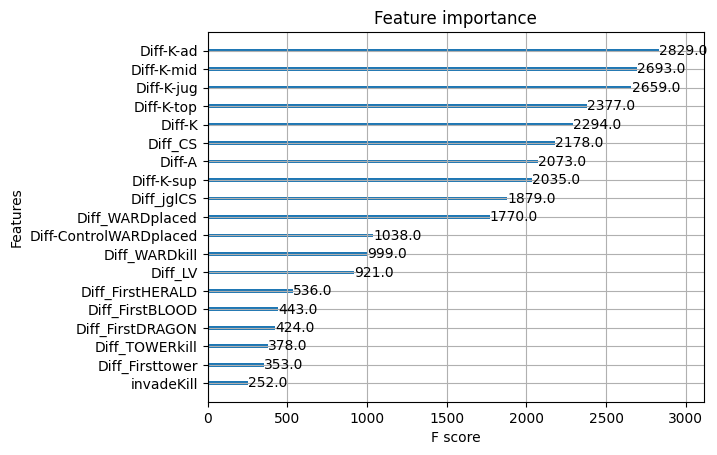

피처 중요도: [0.41644585 0.01611935 0.01384089 0.16112928 0.03146083 0.03435692
 0.03395703 0.04321003 0.02853816 0.0197243  0.02974452 0.0127814
 0.01651979 0.01130671 0.         0.02632835 0.02460873 0.01258086
 0.04045803 0.02688902]


In [88]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# 모델 생성
model = XGBClassifier(n_estimators=500, learning_rate=0.2, max_depth=12, random_state=32)
model.fit(X_train, y_train)

# 피처 중요도 시각화
plot_importance(model)
plt.show()

# 피처 중요도 출력
feature_importance = model.feature_importances_
print("피처 중요도:", feature_importance)

In [87]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

data['result'] = data['result'].replace({-1: 0})


features = ['Diff_LV', 'Diff_CS', 'Diff_jglCS', 'Diff-K', 'Diff-K-top', 'Diff-K-jug', 'Diff-K-mid', 'Diff-K-ad',
            'Diff-K-sup', 'invadeKill', 'Diff-A', 'Diff_WARDplaced', 'Diff-ControlWARDplaced', 'Diff_WARDkill',
            'Diff_Inhibitor', 'Diff_TOWERkill', 'Diff_FirstDRAGON', 'Diff_FirstHERALD', 'Diff_Firsttower', 'Diff_FirstBLOOD']


X_train, X_test, y_train, y_test = train_test_split(data[features], data['result'], test_size=0.25, random_state=32)
model = LGBMClassifier(n_estimators=400)#n_estimators는 의사 결정 트리의 수. 값을 높게 설정 할 수록 정확도가 좋다고 한다.
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("정확도:", accuracy)

[LightGBM] [Info] Number of positive: 7502, number of negative: 7498
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001474 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1095
[LightGBM] [Info] Number of data points in the train set: 15000, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500133 -> initscore=0.000533
[LightGBM] [Info] Start training from score 0.000533
정확도: 0.9366


In [78]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

data['result'] = data['result'].replace({-1: 0})


features = ['Diff_LV', 'Diff_CS', 'Diff_jglCS', 'Diff-K', 'Diff-K-top', 'Diff-K-jug', 'Diff-K-mid', 'Diff-K-ad',
            'Diff-K-sup', 'invadeKill', 'Diff-A', 'Diff_WARDplaced', 'Diff-ControlWARDplaced', 'Diff_WARDkill',
            'Diff_Inhibitor', 'Diff_TOWERkill', 'Diff_FirstDRAGON', 'Diff_FirstHERALD', 'Diff_Firsttower', 'Diff_FirstBLOOD']


X_train, X_test, y_train, y_test = train_test_split(data[features], data['result'], test_size=0.25, random_state=32)
model = CatBoostClassifier(iterations=100, random_state=123)#n_estimators는 의사 결정 트리의 수. 값을 높게 설정 할 수록 정확도가 좋다고 한다.
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("정확도:", accuracy)

Learning rate set to 0.270474
0:	learn: 0.5961991	total: 160ms	remaining: 15.9s
1:	learn: 0.5384462	total: 168ms	remaining: 8.25s
2:	learn: 0.5095264	total: 176ms	remaining: 5.69s
3:	learn: 0.4916534	total: 184ms	remaining: 4.42s
4:	learn: 0.4834179	total: 192ms	remaining: 3.64s
5:	learn: 0.4764284	total: 200ms	remaining: 3.13s
6:	learn: 0.4705565	total: 206ms	remaining: 2.74s
7:	learn: 0.4675314	total: 214ms	remaining: 2.46s
8:	learn: 0.4645884	total: 222ms	remaining: 2.24s
9:	learn: 0.4629103	total: 230ms	remaining: 2.07s
10:	learn: 0.4611448	total: 237ms	remaining: 1.91s
11:	learn: 0.4595504	total: 243ms	remaining: 1.78s
12:	learn: 0.4584065	total: 250ms	remaining: 1.67s
13:	learn: 0.4572587	total: 256ms	remaining: 1.57s
14:	learn: 0.4561538	total: 262ms	remaining: 1.49s
15:	learn: 0.4552950	total: 269ms	remaining: 1.41s
16:	learn: 0.4546128	total: 276ms	remaining: 1.35s
17:	learn: 0.4538532	total: 283ms	remaining: 1.29s
18:	learn: 0.4529135	total: 290ms	remaining: 1.24s
19:	learn: 

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

data['result'] = data['result'].replace({-1: 0})


features = ['Diff_LV', 'Diff_CS', 'Diff_jglCS', 'Diff-K', 'Diff-K-top', 'Diff-K-jug', 'Diff-K-mid', 'Diff-K-ad',
            'Diff-K-sup', 'invadeKill', 'Diff-A', 'Diff_WARDplaced', 'Diff-ControlWARDplaced', 'Diff_WARDkill',
            'Diff_Inhibitor', 'Diff_TOWERkill', 'Diff_FirstDRAGON', 'Diff_FirstHERALD', 'Diff_Firsttower', 'Diff_FirstBLOOD']


X_train, X_test, y_train, y_test = train_test_split(data[features], data['result'], test_size=0.25, random_state=32)
model = ExtraTreesClassifier(n_estimators=100, random_state=32)#n_estimators는 의사 결정 트리의 수. 값을 높게 설정 할 수록 정확도가 좋다고 한다.
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("정확도:", accuracy)

정확도: 0.7506
